# ========================================================================================
# 2m_lesson_5
# ========================================================================================

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [97]:
ads_data = pd.read_csv('/home/jupyter-an.karpov/shared/ads_data.csv.zip', compression='zip')

In [2]:
ads_data = pd.read_csv(r'f:\!PR\Simulation\data\4_ads_data.csv')

In [7]:
ads_data['full_date'] = pd.to_datetime(ads_data.time)

In [5]:
ads_data['full_date'] = pd.to_datetime(ads_data.time)

In [4]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [8]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,full_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2019-04-01 00:00:48
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2019-04-01 00:00:48
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2019-04-01 00:01:03
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2019-04-01 00:01:03
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2019-04-01 00:01:09


In [ ]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


<Axes: xlabel='date'>

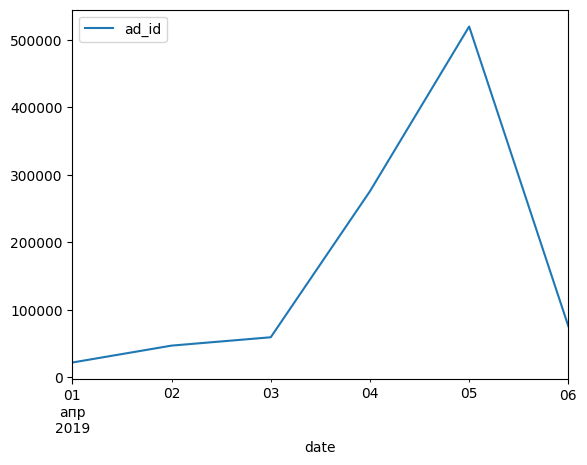

In [17]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [18]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,291,21782
1,2019-04-02,545,46572
2,2019-04-03,460,59023
3,2019-04-04,643,275092
4,2019-04-05,92321,427386
5,2019-04-06,14918,60967


In [20]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,393828
107729,29745
28142,20903
38892,8437
107837,8341


In [21]:
ad_id = 112583

In [22]:
ads_data.query('ad_id == @ad_id').head(1)


,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,full_date
120248,2019-04-05,2019-04-05 00:00:05,view,ios,112583,111818,112260,CPM,210.1,0,22392,2019-04-05 00:00:05


In [72]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [11]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'})

,ad_id,event,time
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [10]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()
ads_data_by_ad

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,NaN,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,NaN,156.0
962,122023,NaN,68.0
963,122031,1.0,138.0


In [12]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [21]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
873,117164,6.0,19.0,0.315789,31.578947
787,112583,105767.0,351802.0,0.300644,30.064354
463,42507,3.0,11.0,0.272727,27.272727
665,98569,3.0,16.0,0.187500,18.750000
621,46639,44.0,253.0,0.173913,17.391304
174,23599,4.0,24.0,0.166667,16.666667
126,19912,4.0,25.0,0.160000,16.000000
756,110414,5.0,32.0,0.156250,15.625000
136,20662,4.0,26.0,0.153846,15.384615
593,45969,2.0,13.0,0.153846,15.384615


In [14]:
ads_data_by_ad.ctr.mean()

np.float64(0.029341727343227063)

In [15]:
ads_data_by_ad.ctr.median()

np.float64(0.018265221017514596)

<Axes: xlabel='ctr', ylabel='Count'>

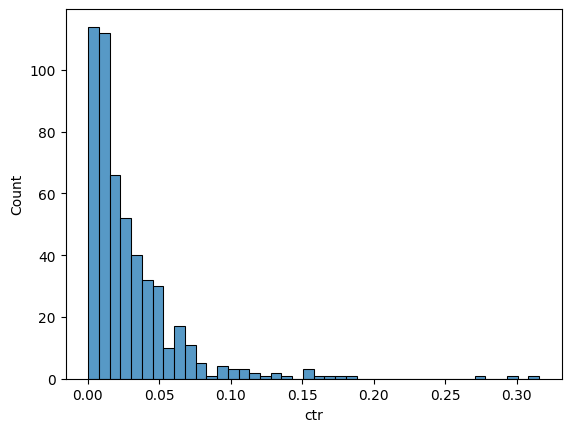

In [17]:
sns.histplot(ads_data_by_ad.ctr, kde=False)

In [86]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [18]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [20]:
ads_ids_bug = ads_data_by_ad.query('click == 0').ad_id
ads_ids_bug

3        2064
5        2468
13       4483
14       4804
24       9431
        ...  
952    121750
958    121944
961    122013
962    122023
964    122078
Name: ad_id, Length: 440, dtype: int64

In [22]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,9263
1,ios,14187
0,android,23099


In [23]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,199665
1,ios,299979
0,android,500356


In [118]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [29]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)
df_2019_04_04

event,ad_id,click,view
0,1902,0.0,7.0
1,2132,1.0,27.0
2,2604,1.0,351.0
3,2709,12.0,2202.0
4,3787,4.0,293.0
...,...,...,...
402,121944,0.0,23.0
403,121964,5.0,60.0
404,122013,0.0,134.0
405,122023,0.0,53.0


In [30]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [31]:
df_2019_04_04

event,ad_id,click,view,ctr
0,1902,0.0,7.0,0.000000
1,2132,1.0,27.0,0.037037
2,2604,1.0,351.0,0.002849
3,2709,12.0,2202.0,0.005450
4,3787,4.0,293.0,0.013652
...,...,...,...,...
402,121944,0.0,23.0,0.000000
403,121964,5.0,60.0,0.083333
404,122013,0.0,134.0,0.000000
405,122023,0.0,53.0,0.000000


In [32]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

np.float64(0.16666666666666666)

In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [33]:
x = pd.Series([1, 2, 3])

In [34]:
import numpy as np

In [35]:
ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')].ad_cost.sum()

np.float64(27311.3)

In [36]:
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')].ad_cost.sum() / 1000

np.float64(171235.0079)

In [155]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [39]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
115,18681,2019-04-05 00:18:20,2019-04-05 02:45:35
174,23599,2019-04-05 00:05:26,2019-04-05 05:48:26
281,32386,2019-04-03 00:03:23,2019-04-03 00:03:25
285,33033,2019-04-05 00:10:28,2019-04-05 03:33:11
329,36758,2019-04-04 01:21:18,2019-04-04 01:23:42
359,38224,2019-04-04 00:02:30,2019-04-04 00:09:24
522,44283,2019-04-04 00:09:24,2019-04-04 00:11:36
539,44766,2019-04-05 00:54:49,2019-04-05 02:02:57
621,46639,2019-04-02 00:01:55,2019-04-02 00:02:06
665,98569,2019-04-04 03:09:35,2019-04-04 07:55:00


In [40]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,full_date
